# KENV MANUAL

<a href=mailto:fuodorov1998@gmail.com>V. Fedorov</a>, <a href=mailto:nikdanila@bk.ru>D. Nikiforov</a>

## We strongly recommend that you read the wiki [here](https://github.com/fuodorov/kenv/wiki).

In [1]:
import kenv as kv

In [15]:
kv.__version__

'0.1.9.1'

Сan call for help:

In [2]:
#help(kv)

## Simulation

To obtain an envelope, you need to create a beam and an accelerator. Then load the simulation of this beam in this accelerator and apply tracking.

In [3]:
beam = kv.Beam(energy=2,
               current=2e3,
               radius_x=30e-3,
               radius_y=30e-3,
               x = 5e-3,
               y = 0,
               radius_xp=30.0e-3,
               radius_yp=30.0e-3,
               normalized_emittance=1000e-6)

Can print:

In [4]:
print(beam)

Beam parameters:
	Current	2000 A
	Energy	2.000 MeV
	Total momentum	2.458 MeV/c
	Rel. factor	4.914
	Radius x	30.0 mm
	Radius y	30.0 mm
	Radius x prime	30.0 mrad
	Radius y prime	30.0 mrad
	Horizontal centroid position	5.0 mm
	Vertical centroid position	0.0 mm
	Horizontal centroid angle	0.0 mrad
	Vertical centroid angle	0.0 mrad
	Larmor angle	0.0 rad
	Normalized emittance x	1000.0 mm*mrad
	Normalized emittance y	1000.0 mm*mrad



In [5]:
acc = kv.Accelerator(0.0, 7, 0.001)

In [6]:
acc.add_sol('Sol. 1', 1, 0.04, 'Bz.dat', x=0.001, y=0.003, xp=0.0, yp=0.0)
acc.add_sol('Sol. 2', 2, 0.02, 'Bz.dat', x=0.002, y=0.003, xp=0.0, yp=0.0)
acc.add_sol('Sol. 3', 3, 0.03, 'Bz.dat', x=0.005, y=0.005)

In [7]:
Accels = [
    [ 4,       -1.0,     'Ez.dat',  'Cavity 3'],
    [ 5,       -1.0,     'Ez.dat',  'Cavity 4'],  
]

In [8]:
for   z0, E0, filename, name in Accels:
    acc.Ez_beamline[name] = kv.Element(z0, E0, filename, name)

In [9]:
acc.compile()

In [10]:
print(acc)

Accelerator structure.
	Solenoids:
	[ 1.00000 m, 0.04000 T, 'Bz.dat', 'Sol. 1', 0.00100 m, 0.00000 rad, 0.00300 m, 0.00000 rad],
	[ 2.00000 m, 0.02000 T, 'Bz.dat', 'Sol. 2', 0.00200 m, 0.00000 rad, 0.00300 m, 0.00000 rad],
	[ 3.00000 m, 0.03000 T, 'Bz.dat', 'Sol. 3', 0.00500 m, 0.00000 rad, 0.00500 m, 0.00000 rad],
	Accelerating modules:
	[ 4.00000 m, -1.00000 T, 'Ez.dat', 'Cavity 3', 0.00000 m, 0.00000 rad, 0.00000 m, 0.00000 rad],
	[ 5.00000 m, -1.00000 T, 'Ez.dat', 'Cavity 4', 0.00000 m, 0.00000 rad, 0.00000 m, 0.00000 rad],
	Quadrupoles:
	Correctors x:
	Correctors y:



## Interactive plot

Now we can combine everything into one interactive plot to see the effect of different variables on the beam envelope.

Some plotting options:

In [11]:
import holoviews as hv
hv.extension('matplotlib')

%opts Layout [tight=True]
%output size=180 backend='matplotlib' fig='png' dpi=200
%opts Curve Spread [aspect=3 show_grid=True] (linewidth=1.5 alpha=1)
%opts Spread (linewidth=1 alpha=0.4)
%opts VLine (color='blue' linewidth=10 alpha=0.1)

dim_z  = hv.Dimension('z',  unit='m', range=(acc.start, acc.stop))
dim_x = hv.Dimension('x', unit='cm', range=(-15, +15))
dim_y = hv.Dimension('y', unit='cm', range=(-15, +15))
dim_r = hv.Dimension('r', unit='cm', range=(-15, +15))
dim_Bz = hv.Dimension('Bz', unit='Gs', label='$B_z$')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [12]:
def x_vs_Bz_plot(solenoid_B_Gs, solenoid_dx_cm, solenoid_dy_cm, part_x_cm, part_y_cm):
    global solenoid2vary, part
    part.x = part_x_cm/1e2
    part.y = part_y_cm/1e2
    acc.Bz_beamline[solenoid2vary].max_field = solenoid_B_Gs/1e4
    acc.Bz_beamline[solenoid2vary].x = solenoid_dx_cm/1e2
    acc.Bz_beamline[solenoid2vary].y = solenoid_dy_cm/1e2
    z = acc.z
    acc.compile()
    
    sim = kv.Simulation(beam, acc, part)
    sim.track()
    
    z0 = acc.Bz_beamline[solenoid2vary].z0
    
    x = sim.centroid_x(z)*100 # cm
    y = sim.centroid_y(z)*100 # cm
    r = (x**2 + y**2)**0.5
    z_x = hv.Curve((z, x), kdims=dim_z, vdims=dim_x).opts(linestyle='--')
    z_y = hv.Curve((z, y), kdims=dim_z, vdims=dim_y).opts(linestyle='--')
    z_r = hv.Curve((z, r), kdims=dim_z, vdims=dim_r).opts(linestyle='--')
    
    x_part = sim.particle_x(z)*100 # cm
    y_part = sim.particle_y(z)*100 # cm
    r_part = (x_part**2 + y_part**2)**0.5
    z_x_part = hv.Curve((z, x_part), kdims=dim_z, vdims=dim_x).opts(linestyle='-.')
    z_y_part = hv.Curve((z, y_part), kdims=dim_z, vdims=dim_y).opts(linestyle='-.')
    z_r_part = hv.Curve((z, r_part), kdims=dim_z, vdims=dim_r).opts(linestyle='-.')

    x_size = sim.envelope_x(z)*100 # cm
    y_size = sim.envelope_y(z)*100 # cm
    r_size = (x_size**2 + y_size**2)**0.5
    x_img = z_x * z_x_part * hv.Spread((z, 0, x_size))
    y_img = z_y * z_y_part * hv.Spread((z, 0, y_size))
    r_img = z_r * z_r_part * hv.Spread((z, 0, r_size))
    
    z_Bz = hv.Curve((z, acc.Bz(z)*1e4), kdims=dim_z, vdims=dim_Bz)
    
    return (x_img*hv.VLine(z0) + y_img*hv.VLine(z0) + r_img*hv.VLine(z0)).cols(1)

:DynamicMap   [Sol. 2,dx,dy,Part x,Part y]
   :Layout
      .Overlay.I   :Overlay
         .Curve.I  :Curve   [z]   (x)
         .Curve.II :Curve   [z]   (x)
         .Spread.I :Spread   [x]   (y,yerror)
         .VLine.I  :VLine   [x,y]
      .Overlay.II  :Overlay
         .Curve.I  :Curve   [z]   (y)
         .Curve.II :Curve   [z]   (y)
         .Spread.I :Spread   [x]   (y,yerror)
         .VLine.I  :VLine   [x,y]
      .Overlay.III :Overlay
         .Curve.I  :Curve   [z]   (r)
         .Curve.II :Curve   [z]   (r)
         .Spread.I :Spread   [x]   (y,yerror)
         .VLine.I  :VLine   [x,y]
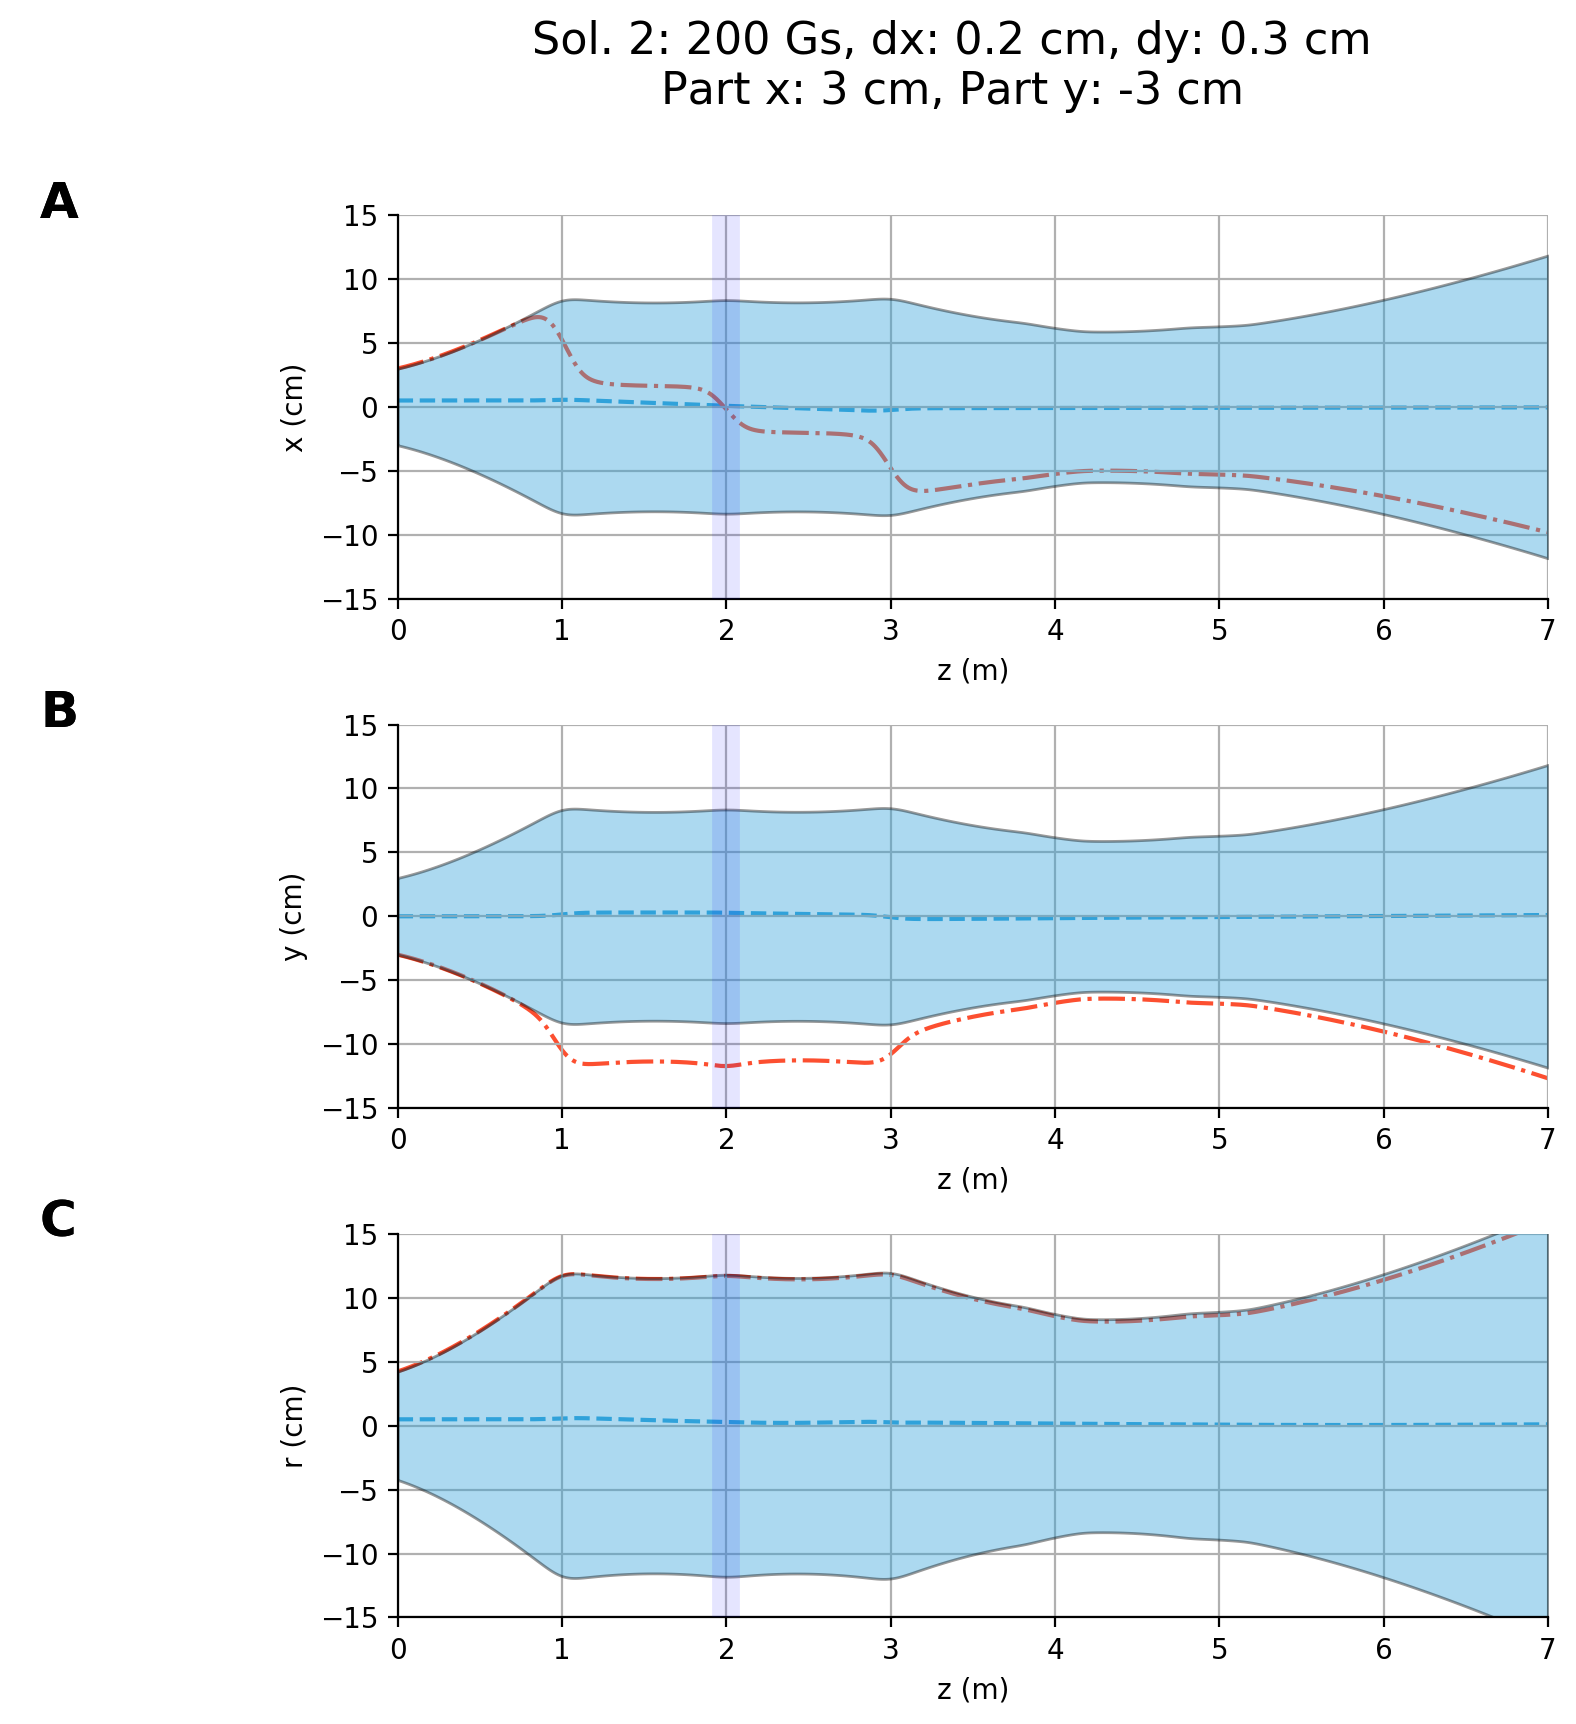

In [13]:
solenoid2vary = 'Sol. 2'
part = kv.Particle(x=30e-3, y=-30e-3, xp=30e-3, yp=-30e-3)

B0 = acc.Bz_beamline[solenoid2vary].max_field # T
x0 = acc.Bz_beamline[solenoid2vary].x*1e2
y0 = acc.Bz_beamline[solenoid2vary].y*1e2
part_x0 = part.x*1e2
part_y0 = part.y*1e2
#dim_sol_var = hv.Dimension('Sol_MaxField',  unit='T', range=(0, 0.1), step=0.001, default=accelerator.Bz_beamline[dim_sol.values[0]].max_field)
dim_sol_B = hv.Dimension(solenoid2vary,  unit='Gs', range=(0, 1500), default=B0*1e4)
dim_sol_dx = hv.Dimension('dx',  unit='cm', range=(-5, 5), step=0.1, default=x0)
dim_sol_dy = hv.Dimension('dy',  unit='cm', range=(-5, 5), step=0.1, default=y0)
dim_part_x = hv.Dimension('Part x',  unit='cm', range=(-7, 7), step=0.1, default=part_x0)
dim_part_y = hv.Dimension('Part y',  unit='cm', range=(-7, 7), step=0.1, default=part_y0)

dmap = hv.DynamicMap(x_vs_Bz_plot, kdims=[dim_sol_B, dim_sol_dx, dim_sol_dy, dim_part_x, dim_part_y])
dmap

In [14]:
print(acc)

Accelerator structure.
	Solenoids:
	[ 1.00000 m, 0.04000 T, 'Bz.dat', 'Sol. 1', 0.00100 m, 0.00000 rad, 0.00300 m, 0.00000 rad],
	[ 2.00000 m, 0.02000 T, 'Bz.dat', 'Sol. 2', 0.00200 m, 0.00000 rad, 0.00300 m, 0.00000 rad],
	[ 3.00000 m, 0.03000 T, 'Bz.dat', 'Sol. 3', 0.00500 m, 0.00000 rad, 0.00500 m, 0.00000 rad],
	Accelerating modules:
	[ 4.00000 m, -1.00000 T, 'Ez.dat', 'Cavity 3', 0.00000 m, 0.00000 rad, 0.00000 m, 0.00000 rad],
	[ 5.00000 m, -1.00000 T, 'Ez.dat', 'Cavity 4', 0.00000 m, 0.00000 rad, 0.00000 m, 0.00000 rad],
	Quadrupoles:
	Correctors x:
	Correctors y:

